In [1]:
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow import keras
import tensorflow as tf
from matplotlib.image import imread
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.applications import VGG16

Using TensorFlow backend.


In [2]:
# create a data generator
datagen = ImageDataGenerator(rescale=1./255)

In [3]:
batch_size = 128
epochs = 150
IMG_HEIGHT = 150
IMG_WIDTH = 150

total_train=1440
total_val=480
epochs_to_wait_for_improve = 5

In [4]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('anuka1200/train/', class_mode='binary', batch_size=batch_size, shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))
# load and iterate validation dataset
val_it = datagen.flow_from_directory('anuka1200/validation/', class_mode='binary', batch_size=64, target_size=(IMG_HEIGHT, IMG_WIDTH))
# load and iterate test dataset
test_it = datagen.flow_from_directory('anuka1200/test/', class_mode='binary', batch_size=64, target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 1440 images belonging to 2 classes.
Found 480 images belonging to 2 classes.
Found 480 images belonging to 2 classes.


In [5]:
# confirm the iterator works
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(128, 150, 150, 3), min=0.000, max=0.980


In [6]:
# visualize images from batches
sample_training_images, _ = next(train_it)

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


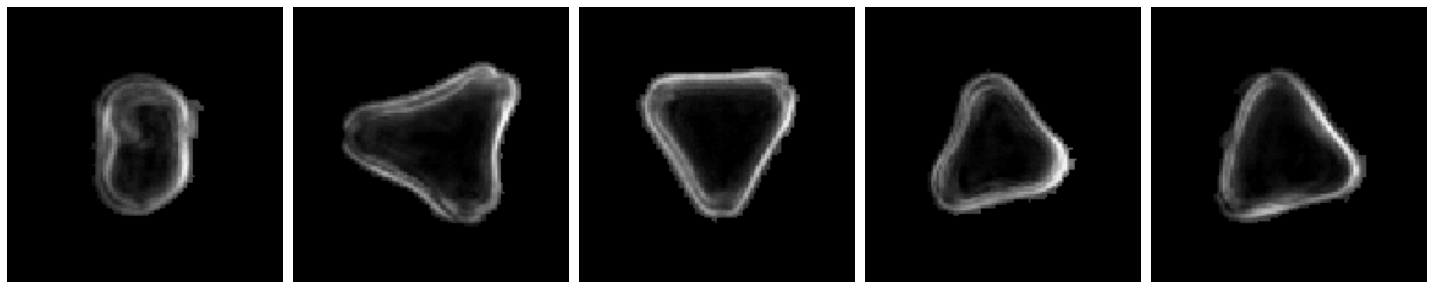

In [7]:
plotImages(sample_training_images[:5])

# Callbacks

In [ ]:
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.99):ç
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

# Instantiate callback
mycallback = myCallback()


early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                        patience=epochs_to_wait_for_improve,
                                                        verbose = 2)

# VGG16 Model

In [9]:
VGG16_MODEL=tf.keras.applications.VGG16(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                                               include_top=False,
                                               weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
VGG16_MODEL.trainable=False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer =Dense(2, activation='softmax')

In [11]:
model_vgg = tf.keras.Sequential([
  VGG16_MODEL,
  global_average_layer,
  prediction_layer
])

model_vgg.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:

history_vgg = model_vgg.fit_generator(
    train_it,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_it,
    validation_steps=total_val // batch_size,
    callbacks=[early_stopping_callback, mycallback]
) 

# It takes a while...

Epoch 1/150
12/12 [==============================] - 1209s 101s/step - loss: 0.7503 - acc: 0.4889 - val_loss: 0.6981 - val_acc: 0.5542
Epoch 2/150
12/12 [==============================] - 1914s 160s/step - loss: 0.6695 - acc: 0.6292 - val_loss: 0.6472 - val_acc: 0.6521
Epoch 3/150
12/12 [==============================] - 1704s 142s/step - loss: 0.6232 - acc: 0.7063 - val_loss: 0.6102 - val_acc: 0.7063
Epoch 4/150
12/12 [==============================] - 752s 63s/step - loss: 0.5820 - acc: 0.7285 - val_loss: 0.5815 - val_acc: 0.7063
Epoch 5/150
12/12 [==============================] - 737s 61s/step - loss: 0.5579 - acc: 0.7451 - val_loss: 0.5563 - val_acc: 0.7042
Epoch 6/150
12/12 [==============================] - 700s 58s/step - loss: 0.5290 - acc: 0.7569 - val_loss: 0.5341 - val_acc: 0.7208
Epoch 7/150
12/12 [==============================] - 748s 62s/step - loss: 0.5078 - acc: 0.7667 - val_loss: 0.5174 - val_acc: 0.7396
Epoch 8/150
12/12 [==============================] - 745s 62s/s

Epoch 39/150
12/12 [==============================] - 691s 58s/step - loss: 0.2651 - acc: 0.9111 - val_loss: 0.3175 - val_acc: 0.8687
Epoch 40/150
12/12 [==============================] - 671s 56s/step - loss: 0.2676 - acc: 0.9125 - val_loss: 0.3192 - val_acc: 0.8667
Epoch 41/150
12/12 [==============================] - 671s 56s/step - loss: 0.2612 - acc: 0.9132 - val_loss: 0.3198 - val_acc: 0.8708
Epoch 42/150
12/12 [==============================] - 673s 56s/step - loss: 0.2551 - acc: 0.9125 - val_loss: 0.3130 - val_acc: 0.8708
Epoch 43/150
12/12 [==============================] - 671s 56s/step - loss: 0.2622 - acc: 0.9160 - val_loss: 0.3083 - val_acc: 0.8687
Epoch 44/150
12/12 [==============================] - 670s 56s/step - loss: 0.2540 - acc: 0.9139 - val_loss: 0.3083 - val_acc: 0.8750
Epoch 45/150
12/12 [==============================] - 656s 55s/step - loss: 0.2540 - acc: 0.9132 - val_loss: 0.3062 - val_acc: 0.8667
Epoch 46/150
12/12 [==============================] - 689s 57s

In [ ]:
# Visualize training results
acc = history_vgg.history['acc']
val_acc = history_vgg.history['val_acc']

loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
test_loss, test_acc = model_vgg.evaluate(test_it, verbose=5)

print('\nTest accuracy:', test_acc)


# evaluate model
loss = model_vgg.evaluate_generator(test_it, steps=24)
print(loss)

In [ ]:
import sklearn.metrics as metrics

Y_pred = model_vgg.predict(test_it, test_it.samples / batch_size)
val_preds = np.argmax(Y_pred, axis=1)

val_trues =val_it.classes
cm = metrics.confusion_matrix(val_trues, val_preds)
cm